In [1]:
###########################################################
# 데이터 전처리
###########################################################
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale=1./255)  # 모든 이미지를 1/255로 스케일을 조정합니다
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "./dataset/new_train_samples/train"
validation_dir = './dataset/new_train_samples/validation'

train_generator = train_datagen.flow_from_directory( \
        train_dir,                  # 타깃 디렉터리
        target_size=(150, 150),     # 모든 이미지를 150 × 150 크기
        batch_size=20,
        class_mode='binary')        #

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 613 images belonging to 2 classes.
Found 167 images belonging to 2 classes.


배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


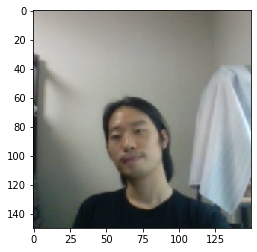

In [2]:
"제너레이터의 출력:  150 × 150  RGB "
"이미지의 배치((20, 150, 150, 3) 크기)와 이진 레이블의 배치((20,) 크기)  "
"각 배치에는 20개의 샘플(배치 크기)  "

for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)  #(20, 150, 150, 3)
    print('배치 레이블 크기:', labels_batch.shape) #(20,)
    break

import matplotlib.pyplot as plt
plt.imshow(  train_generator[0][0][0] )
plt.show()

In [3]:
###########################################################
# 학습
###########################################################
from model import makeModel
from tensorflow.keras.models import load_model
import tensorflow as tf

model =  makeModel()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

D:\Program Files\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [4]:
import os 
if os.path.exists("./tn_model/t_model") :
    model = load_model("./tn_model/t_model")  

checkpoint_path = "./tn_model/t_model.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 모델의 가중치를 저장하는 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = model.fit(
      train_generator ,
      steps_per_epoch=12  ,
      epochs=50 ,
      validation_data=validation_generator,
      validation_steps=6,
      callbacks=[cp_callback])

Epoch 1/50
12/12 [==============================] - 7s 202ms/step - loss: 0.6818 - acc: 0.5458 - val_loss: 0.6645 - val_acc: 0.5500

Epoch 00001: saving model to ./tn_model\t_model.ckpt
Epoch 2/50
12/12 [==============================] - 1s 112ms/step - loss: 0.6071 - acc: 0.7083 - val_loss: 0.6569 - val_acc: 0.5917

Epoch 00002: saving model to ./tn_model\t_model.ckpt
Epoch 3/50
12/12 [==============================] - 1s 76ms/step - loss: 0.5124 - acc: 0.7458 - val_loss: 0.5979 - val_acc: 0.5500

Epoch 00003: saving model to ./tn_model\t_model.ckpt
Epoch 4/50
12/12 [==============================] - 1s 63ms/step - loss: 0.4291 - acc: 0.8167 - val_loss: 0.5826 - val_acc: 0.6000

Epoch 00004: saving model to ./tn_model\t_model.ckpt
Epoch 5/50
12/12 [==============================] - 1s 104ms/step - loss: 0.3834 - acc: 0.8197 - val_loss: 0.5889 - val_acc: 0.5833

Epoch 00005: saving model to ./tn_model\t_model.ckpt
Epoch 6/50
12/12 [==============================] - 1s 69ms/step - loss:

In [5]:
model.save("./tn_model/t_model.h5") 

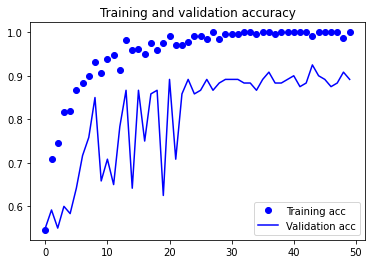

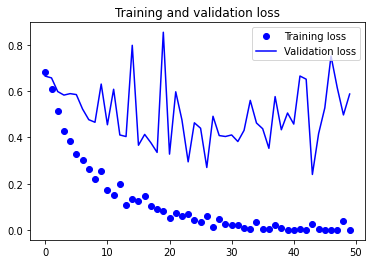

In [6]:
###########################################################
# 학습 결과 정확도 및 비용 그래프
###########################################################
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


[[0.00893721]]


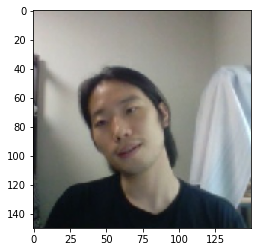

In [7]:
########################################################
import matplotlib.pyplot as plt 
print( model.predict( train_generator[10][0][0].reshape(-1,150,150,3) ))
plt.imshow(  train_generator[10][0][0]  )
plt.show()

In [8]:
from tensorflow.keras.models import load_model    #학습된 모델 로드

model = load_model("./tn_model/t_model.h5")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow import keras
model = keras.models.load_model("./tn_model/t_model.h5", compile=False)

export_path = './tn_model/'
model.save(export_path, save_format='tf')

In [1]:
import tensorflow as tf
from tensorflow.python.tools import freeze_graph
def main():
    freeze_graph.freeze_graph('./tn_model/tn_graph.pbtxt', "", False, './tn_model/t_model.ckpt', 
    'output_node_name', "save/restore_all", "save/Const", 'frozen.pb', True, "") 
    print('done.')
if __name__ == '__main__':
    main()

Instructions for updating:
Use standard file APIs to check for files with this prefix.


ValueError: No variables to save